<a href="https://colab.research.google.com/github/damianomarsili/temp/blob/main/Final_Project_Submission_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Inpainting with GAN's
Project mentor: Guanghui Qin

Kevin Kim <kkim170@jh.edu>, Camden Shultz <cshultz3@jh.edu>, Jocelyn Hsu <jhsu37@jh.edu>, Damiano Marsili <dmarsil1@jh.edu>

Github link: https://github.com/475-Machine-Learning-Project/Machine-Learning-Final-Project.git

# Outline and Deliverables - TODO

TODO: LINKS TO SECTIONS

### Uncompleted Deliverables
1. Different input images: We were unable to extend our use-case past landscape images. Our model will work for different types of images, but the accuracy is poor on non-landscape images. Extending our use-case would have required a significantly larger training set and thus a greatly increased training time. We did not have the time or computational resources to do so. However, we are confident given enough training data and time, our implementation can be extended to different image domains.


### Completed Deliverables
1. Masks on images: We discuss our masking and preprocessing [in "Pre-processing" below](##Pre-processing).
2. Trained a GAN on landscape images: We discuss training our GAN [in "Methods" below](TODO).
3. Successfully inpainted images: We discuss our inpainting technique [in "?" below](TODO).
4. Implemented Navier-Stokes baseline comparison: We discuss our baselines [in "Baselines" below](TODO).
5. Implemented FID evaluation metric: We discuss our evaluation metric [in "Experimental Setup" below](TODO).


### Additional Deliverables
1. We decided to add a Fast-Marching algorithm as a second baseline metric. We discuss this [in "Baselines" below](TODO).
2. We experimented with different mask sizes and were able to maintain decent accuracy. We discuss this [in "?" below](TODO).
3. We added a feature allowing users to upload their own images and see how our model performs on them. We discuss this [in "?" below](TODO).

# Preliminaries

## Problem Definition

Our final project tackles the task of image inpainting, which refers to the challenge of repairing missing or damaged portions of an image in such a way that the generated image closely resembles the original image. As an example, in the images below, an inpainting solution would attempt to fill in the white squares to best reproduce an input that can plausibly pass for the original image. To achieve this task, we will use a Generative Adversarial Network (GAN).


![Example of inpainting challenge](./sample_imgs/intro1.PNG)

## Use cases
Image inpainting is a widely applicable image editing technique. One of the most useful applications is repairing damaged or old images. An example of this is given in the images below. The input images on the left have visible signs of damage, and we can use inpainting to 'repair' the images, as shown with the images on the right.


![Use cases](./sample_imgs/use_case.PNG)

Another application of image inpainting is the ability to remove unwanted items from an image. For instance, a picture of a scenic landscape taken on vacation may be interrupted by a tourist. Image inpainting can be used to remove the tourist from the image and restore the scenic landscape.

## Uniqueness
Image inpainting and the broader topic of GANs is unique and exciting as we are creating meaningful new data without labels. In contrast to the majority of the algorithms we covered in the course, which revolve around classification or regression, we are instead using machine learning to produce new data that can plausibly pass for a sample instance in the input dataset.

Our approach with GANs is related to our learning of autoencoders in class. We draw this comparison as we are attempting to learn properties of the input in an attempt to regenerate instances similar to it.

## Ethical Implications
There is a significant ethical implication of the task, and that is that it can be used for deception if it is used incorrectly. For instance, image inpainting can be used to remove evidence from pictures of a crime, or produce realistic false images for the purpose of fake news. Some examples of falsified images are:
* Time's cover with OJ's skin darkened (June 27, 1994)
* National Geographic's cover of the pyramids
* Ford's advertisement in which a black person was changed into a white person
* A photo of Bill Clinton together with Ronald Reagan... published before the two ever met

## Dataset
For our project we utilized the MIT Places dataset, Which is one of the largest image datasets. We chose the MIT Places Dataset as it provides high coverage and high diversity of examples for landscapes, which we identified as our target image set. The dataset features 10 million 256x256 images covering 434 disjoint categories of scenes and landscapes. For primary testing, we will mainly use low variance images, as we hypothesize these will be easier to inpaint due to the low variance of RGB values for all the pixels in the image. Our low variance set includes the "Snow field", "Sky", "Mountains" and "Cornfields" image set. Each of the four sets contains around 15,000 images, for a total set of 60,000 images. We show a handful of examples below:

### Sky
![Sky](./sample_imgs/image_examples/sky/00000001.jpg)

### Snowfield
![Snowfield](./sample_imgs/image_examples/snowfield/00000002.jpg)

### Mountain
![Mountain](./sample_imgs/image_examples/mountain/00000003.jpg)

### Cornfield
![Cornfield](./sample_imgs/image_examples/cornfield/00000004.jpg)

## Pre-processing

TODO: this section

What features did you use or choose not to use? Why?

If you have categorical labels, were your datasets class-balanced?

How did you deal with missing data? What about outliers?

What approach(es) did you use to pre-process your data? Why?

Are your features continuous or categorical? How do you treat these features differently?

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


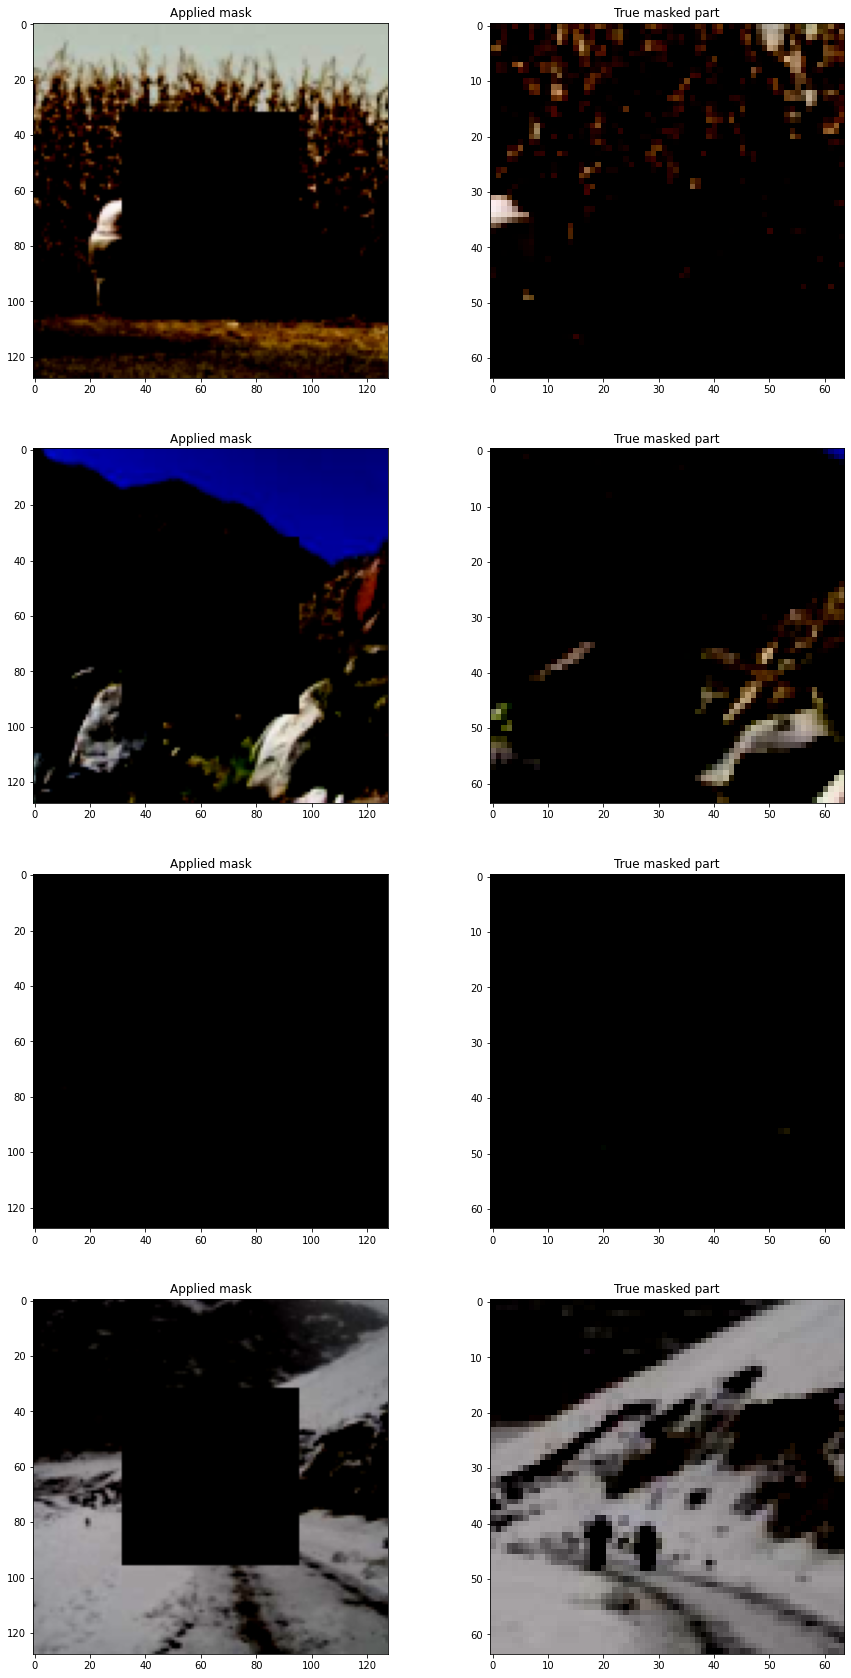

In [42]:
# For those same examples above, what do they look like after being pre-processed?
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

image_size = 128

dataset = dset.ImageFolder(root='./sample_imgs/image_examples',
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
fig, ax = plt.subplots(4,2, figsize=(15, 30))
for i in range(len(dataset.classes)):
    orig_im, label = dataset[i]
    true_masked_part = orig_im[:,32:96, 32:96]
    ax[i][1].imshow(true_masked_part.permute(1, 2, 0))
    ax[i][1].set_title('True masked part')
    orig_im[0,32:96,32:96] = (2 * 117.0 / 255.0 - 1.0)
    orig_im[1,32:96,32:96] = (2 * 104.0 / 255.0 - 1.0)
    orig_im[2,32:96,32:96] = (2 * 123.0 / 255.0 - 1.0)
    ax[i][0].imshow(orig_im.permute(1, 2, 0))
    ax[i][0].set_title('Applied mask')
    
plt.show()

In [ ]:
# Visualize the distribution of your data before and after pre-processing.
#   You may borrow from how we visualized data in the Lab homeworks.

# Models and Evaluation

## Experimental Setup
As our evaluation metric, we decided to use Frechlet Inception Distance (FID). We had originally planned to use Inception Score (IS), but found that FID was more sensitive to small quantitative changes in the image that are extremely noticeable by humans. This was particularly true of blurring, where IS scored blurry images much lower than FID (where lower scores indicate a better generated image). FID works by comparing the activations of a deep layer of a pretrained model named Inception v3. Since we are considering the activations of a deep layer close to the output, the activations effectively capture similarity as a human would interpret it. The formula for FID is given as:


$$FID = 	\lVert  \mu - \mu_w  \rVert^2_2 + tr(\Sigma + \Sigma_w - 2(\Sigma^{1/2} \Sigma_w \Sigma^{1/2})^{1/2})$$

Where $\mu$ and $\mu_w$ are the means and $\Sigma$ and $\Sigma_w$ are the covariance matrices of the activation scores of the two images passed to the Inception v3 model. We implement FID as follows:

In [1]:
import numpy as np
from scipy.linalg import sqrtm

def fid(inception_model, imgs1, imgs2):
  # Extract convolutions from inception model
  conv1 = inception_model.predict(imgs1)
  conv2 = inception_model.predict(imgs2)

  # Compute mean & cov
  m1, cov1 = conv1.mean(axis=0), np.cov(conv1, rowvar=False)
  m2, cov2 = conv2.mean(axis=0), np.cov(conv2, rowvar=False)

  # Sum squared difference of means
  ss = np.sum((m1 - m2) ** 2)
  
  # Square root of cov product
  mean_cov = sqrtm(cov1.dot(cov2))

  # Sanity check for im numbers
  if np.iscomplexobj(mean_cov):
    mean_cov = mean_cov.real
  
  FID = ss + np.trace(cov1 + cov2 - 2.0 * mean_cov)
  return FID

For our loss function, we opted for (? TODO). We chose this loss function as (? TODO). We also attempted to use Wassersetein loss and Mean-Squared Error (MSE), although we found these functions to perform worse upon experimentation, particularly as they seemed to favor blurry images which a human could easily determine were false upon inspection. The formula for our loss function is given as:

TODO: loss function formula

In [ ]:
# Code for loss functions
import torch
import torch.nn as nn

# loss function for training generator and discriminator based on real and fake images
criterion = nn.BCELoss()

# weighted MSE loss function for inpainting
weightRecon = 0.999
def get_weights(prediction_size: torch.Size):
    loss_weights = torch.ones(prediction_size)
    return loss_weights

def weighted_mse_loss(outputs, targets, weights):
    return torch.mean(weights * (outputs - targets).pow(2))

l2_weights = get_weights(fake.size())
lossGeneratorRecon = weighted_mse_loss(fake, true_masked_part, l2_weights.to(device))
lossGeneratorTotal = (1 - weightRecon) * errG + weightRecon * lossGeneratorRecon

For our data split, we decided on a (TODO: ?) split. We decided on this split as we felt we needed as many images as possible for training, since the model would need to learn a fairly complex representation in order to generate plausible images. Since testing relies on a pretrained GAN, we felt we did not need an excessively large testing set to evaluate our models performance appropriately.

## Baselines 
We compared our model against two analytical baselines: Navier-Stokes and Fast Marching. Navier-Stokes is a differential equations based solution which works by projecting eigenvectors into the masked region and using those to predict the missing pixel values. On the other hand, Fast Marching works by evaluating a neighborhood of pixels around the border of the mask and using those to determine the values of the missing pixels, slowly working towards the center. These are reasonable baselines as they are standard pre-machine-learning methods for image inpainting, and therefore are extremely well documented and their effectiveness has been previously established. Moreover, these baseline methods are extremely easy to implement, so we could focus our attention on our model. We show some sample inpainted pictures using the baseline methods below. The image on the left shows the original image, the middle image shows the mask and the rightmost image shows the analytical inpainted solution.

Navier Stokes:

![Navier Stokes example](./sample_imgs/nav_stokes1.PNG)

Fast-Marching:

![Fast-Marching image](./sample_imgs/fast_marching1.PNG)

## Methods

<!-- We chose to implement the Generative Adversarial Network (GAN) for our image inpainting task. We chose this method because our ultimate goal is to infill a missing portion of an image by building a generator, and the adversarial nature of GAN with the addition of a discriminator allows us to improve our generator's performance. First, we trained the discriminator on real landscape data and (untrained) generator-created data. Afterwards, we let the generator inpaint the masked portion of images and optimize the generator's performance by running the discriminator on the generator's output. 

Once the generator was trained and hyperparameters tuned in accordance with the minimax loss (minimize with respect to the discriminator and maximize with respect to the generator), we completed the image inpainting task on our test set. We evaluated the model's performance on the test set with the Frechlet Inception Distance (FID) due to its sensitivity to small pixel value changes, which is essential to achieving realistic image inpainting.

Overall, it was easy to implement (TODO: ). We found training the GAN to be challenging, as the disciminator loss often decreased to 0 due to vanishing gradients, causing the generator to inpaint masks with very incorrect values. Furthermore, GAN requires a very large dataset to train, so our model's performance was limited by computational resources. (TODO: still adding Poisson blending?)

(TODO) For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings? -->

### Generative Adversarial Networks
For our image inpainting task, we chose to implement a Generative Adversarial Netwowrk (GAN). GAN training is an unsupervised learning task that involves discovering regularities from input data such that we can generate input instances the could have plausibly been drawn from the input set. GANs are composed of two models, a generator and a discriminator. During training, the two models are pitted against each other in a zero-sum game, where the generator has to generate images in an attempt to fool the discriminator, who labels the images as real or fake. A diagram of the model's training architecture is shown below.

![Gan Diagram](./sample_imgs/gan.png)

### Generator Model
Our generator model is used to generate new output images. The model receives a random fixed-length vector as an input. The values for this vector are drawn from a Gaussian distribution and serve to seed the generator. During training, the generator learns to form an encoded representation of the data's distribution, with the vector space composed of latent variables. For generation, the generator draws new points from the latent space to generate new output images. Our implementation of the generator model is shown below:

In [ ]:
# Generator model definition

class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=(4,4),stride=2,padding=1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            #128 images
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(4,4),stride=2,padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(4,4),stride=2,padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(in_channels=128,out_channels=256,kernel_size=(4,4),stride=2,padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(in_channels=256,out_channels=512,kernel_size=(4,4),stride=2,padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512,2048,kernel_size=(4,4)),#bottleneck

            # Decoder Part

            nn.BatchNorm2d(2048),
            nn.LeakyReLU(0.2, inplace=True),

            nn.ConvTranspose2d(in_channels=2048,out_channels=512,kernel_size=(4,4),stride=1,padding=0),
            nn.BatchNorm2d(512),
            nn.ReLU(),

            nn.ConvTranspose2d(in_channels=512,out_channels=256,kernel_size=(4,4),stride=2,padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),

            nn.ConvTranspose2d(in_channels=256,out_channels=128,kernel_size=(4,4),stride=2,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),

            # outputting 32x32 here

            nn.ConvTranspose2d(in_channels=128,out_channels=64,kernel_size=(4,4),stride=2,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            #outputting 64x64 here

            # nn.ConvTranspose2d(in_channels=64,out_channels=64,kernel_size=(4,4),stride=2,padding=1),
            # nn.BatchNorm2d(64),
            # nn.ReLU(),

            # outputting 128x128 here

            nn.ConvTranspose2d(in_channels=64,out_channels=3,kernel_size=(4,4),stride=2,padding=1, bias=False),
            nn.Tanh(),

        )

    def forward(self, input):
        return self.main(input)

### Discriminator
The discriminator model is used to classify images as real or fake. Thus, the discriminator model addresses a binary classification problem, with true/false corresponding to real/fake. The discriminator model is trained against images generated by the generator as well as real images. The generator and discriminator are trained together. Our implementation of the discriminator is shown below:

In [ ]:
# Discriminator model definition

class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.Conv2d(in_channels=3,out_channels=64,kernel_size=(4,4),stride=2,padding=1),
            nn.LeakyReLU(0.2, inplace=True),

            ## uncomment to import 128x128 masks
            # nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(4,4),stride=2,padding=1),
            # nn.BatchNorm2d(64),
            # nn.LeakyReLU(0.2,in_place=True),

            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(4,4),stride=2,padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(in_channels=128,out_channels=256,kernel_size=(4,4),stride=2,padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(in_channels=256,out_channels=512,kernel_size=(4,4),stride=2,padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(in_channels=512,out_channels=1,kernel_size=(4,4), bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

### Vanishing Gradients
One issue with training GANs is that often times the discriminator will become too good, as the generator outputs garbage that the discriminator can easily classify as fake. If this is the case, generator training will fail due to vanishing gradients, just as we discussed with deep networks in class. As a solution, we update the generator to maximize the probability of the discriminator making an incorrect choice. This is expressed as:

![Vanishing gradients](./sample_imgs/vanish_grad.png)

### Pipeline (TODO: CHECK THIS IS STILL CORRECT PIPELINE)
Our task pipeline is as follows:
1. Train the discriminator model on real data, labeled as real.
2. Train discriminator on generator-created data, labeled as fake.
3. Train generator based on discriminator output.
4. Once GAN is trained, use pre-trained generator for the inpainting task.

Our implementation for the model training is shown below:

In [ ]:
# Training code

from re import L

# Lists to keep track of progress
img_list = []
G_losses = []
G_mse_losses = []
G_Tot_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # For each batch in the dataloader
    for i, data in enumerate(dataloader, 0):

        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        ## Train with all-real batch
        netD.zero_grad()
        # Format batch
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)

        masked_samples, true_masked_part = get_block_mask(real_cpu)

        # Forward pass real batch through D
        output = netD(true_masked_part).view(-1)
        # Calculate loss on all-real batch
        errD_real = criterion(output, label)
        # Calculate gradients for D in backward pass
        errD_real.backward()
        D_x = output.mean().item()

        ## Train with all-fake batch
        # Generate batch of latent vectors
        #noise = torch.randn(b_size, nz, 1, 1, device=device)

        # Generate fake image batch with G
        fake = netG(masked_samples)
        label.fill_(fake_label)
        # Classify all fake batch with D
        output = netD(fake.detach()).view(-1)
        # Calculate D's loss on the all-fake batch
        errD_fake = criterion(output, label)
        # Calculate the gradients for this batch, accumulated (summed) with previous gradients
        errD_fake.backward()
        D_G_z1 = output.mean().item()

        # Compute error of D as sum over the fake and the real batches
        errD = errD_real + errD_fake
        # Update D
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        label.fill_(real_label)  # fake labels are real for generator cost
        
        # Since we just updated D, perform another forward pass of all-fake batch through D
        output = netD(fake).view(-1)
        # Calculate G's loss based on this output
        errG = criterion(output, label)
        D_G_z2 = output.mean().item()

        # Add MSE lost between generated infil and origional
        l2_weights = get_weights(fake.size())
        lossGeneratorRecon = weighted_mse_loss(fake, true_masked_part, l2_weights.to(device))
        lossGeneratorTotal = (1 - weightRecon) * errG + weightRecon * lossGeneratorRecon

        lossGeneratorTotal.backward()
        optimizerG.step()
        
        # Output training stats
        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

            # Save Losses for plotting later
            G_losses.append(errG.item())
            G_mse_losses.append(lossGeneratorRecon.item())
            G_Tot_losses.append(lossGeneratorTotal.item())
            D_losses.append(errD.item())


        # Check how the generator is doing by saving G's output on fixed_noise
        if (iters % 50 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(viz_masked_samples).detach().cpu()
                viz_infill = viz_masked_samples.clone()
                viz_infill[:,:,32:96,32:96] = fake
            img_list.append(vutils.make_grid(viz_infill[:64].cpu(), padding=2, normalize=True))

        iters += 1

In [ ]:
# Show plots of how these models performed during training.
#  For example, plot train loss and train accuracy (or other evaluation metric) on the y-axis,
#  with number of iterations or number of examples on the x-axis.

### Generator & Discriminator Loss
![Loss](./sample_imgs/loss.png)

### Inpainting Task (TODO: CHECK THIS IS STILL CORRECT)
For the inpainting task, we run our pre-trained discriminator on masked images. Then, we optimize our pretrained generator's latent variables to recreate the infill such as to fool the discriminator. This method is advantageous as we do not need a GAN specifically trained for infilling, so we can use our GAN trained on an easily available dataset of landscape images. For the inpainting task, we define the inpainting loss $L_i$ as: 

$$L_i = L_c + $$ 

TODO

In [ ]:
# Inpainting code
from google.colab import files
import PIL
uploaded = files.upload()

for key in uploaded.keys():
  im = PIL.Image.open(key)

#convert_tensor = transforms.ToTensor()
convert_tensor=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor()
                           ])


im_tensor = convert_tensor(im)
print(im_tensor.shape)
if im_tensor.shape[0] != 3:
  im_tensor = im_tensor[0:3,:,:]
im_tensor = im_tensor.unsqueeze(dim=0).to(device)
print(im_tensor.shape)
plt.imshow(im)
plt.show() 

test_masked_samples, test_true_masked_part = get_block_mask(im_tensor.to(device))

with torch.no_grad():
  fake = netG(test_masked_samples).detach().cpu()
  viz_infill = test_masked_samples.clone()
  viz_infill[:,:,32:96,32:96] = fake


plt.figure()
plt.axis("off")
plt.title("Reconstructued Image Center")
plt.imshow(np.transpose(vutils.make_grid(viz_infill[-1].cpu(), padding=2, normalize=True),(1,2,0)))

### Training Difficulties: TODO:

## Results

Show tables comparing your methods to the baselines.

What about these results surprised you? Why?

Did your models over- or under-fit? How can you tell? What did you do to address these issues?

What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?  

In [ ]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?

# Discussion

## What you've learned

The project was an excellent opportunity to explore GANs, which is a fascinating field in machine learning that we were not previously familiar with. It was interesting to see that many of the things we had learned in the course were still applicable, though. For instance, we made great use of convolutional neural networks and binary classification models when defining our GAN architecture. 

We also worked extensively with loss functions and explored various alternatives (MSE for pixel values & Wasserstein loss) before deciding on our given loss function. We felt there was a lot of flexibility for loss functions for our GAN and it was interesting to experiment and determine which performed the best.

What we found most surprising is the ability for a model to simulate creativity. Some of the images produced were incredibly close to the original image, and the premise of generating new meaningful data without labels was a fascinating area to explore.

If we had two more weeks to work on our project, we'd like to incorporate some image blending techniques, such as Poisson blending, as we found our inpainting squares to be a little bit jarring around the edges. We think if the edges were smoothed slightly the inpainted images would look much better.

There are a few lessons we will take from this project and apply to future projects. First, we learned to not underestimate computational limitations when training on image data. We used Colab Pro for training, and had to leave our models training overnight - which led to frequently getting disconnected. We eventually had to implement a checkpoint system, such that disconnected training could resume at the epoch it stopped at. We think this will transfer to any projects which has long training times. Second, we learned to not underestimate the importance of data pre-processing, particularly to ensure all of the input images are of the correct dimensions. If we had spent more time cleaning up our input data, we would have avoided many dimension-related bug headaches down the line.

During our presentation and proposal, we were recommended to implement a checkpoint system for our training as well as not to worry about the accuracy of the model. These two pieces of feedback were extremely helpful, as we began storing model progress to circumvent getting disconnected and shifted our focus from perfecting accuracy to achieving more of our additional deliverables.